# Problem Statement

X Education, an online course provider, faces a low lead conversion rate of approximately 30%. The company seeks to improve this by identifying potential 'Hot Leads' from their acquired leads. The goal is to build a predictive model that assigns a lead score to each lead, indicating the likelihood of conversion. This model aims to increase the lead conversion rate to around 80%, enabling the sales team to focus on the most promising leads and enhance overall efficiency in the lead conversion process.

steps involed   

step 1: Importing data 

step 2: Inspecting the dataframe

step 3: Data cleaning 

step 4: Train-test split

step 5: Feature scaling 

step 6: Looking at correlations

step 7: Feature selection using RFE

step 8: Model building

step 9: Model Evaluation

step 10: Plotting the roc curve

step 11: Finding the optimal cutoff point

step 12: Making predictions on test set

## Step1-  Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing dataset
leads= pd.read_csv("Leads.csv")

## Step2 - Inspecting the dataframe

In [4]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
#checking dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
# cheking  statistical aspects of the dataframe
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# checking the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: Data Preparation

### Converting binary variables (Yes/No) to 0/1

In [8]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search','Magazine', 'Newspaper Article', 'X Education Forums', 
            'Newspaper', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the varlist
leads[varlist] = leads[varlist].apply(binary_map)


In [9]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                         0          Select  Select   
1                         0          Select  Select   
2                         0  Potential Lead  Mumbai   
3                         0          Select  Mumbai   
4                         0          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                        15.0                        15.0   
1                        15.0                        15.0   
2                        14.0                        20.0   
3                        13.0                        17.0   
4                        15.0                        18.0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 37 columns]

### Handling missing values

In [10]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [11]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

<span style="color:blue">**NOTE:**</span> columns with more than 30% missing values are not relevant for the analysis therefore we will proceed with removing those columns

In [12]:
#checking list of columns with more than 30% missing values and removing them
cols_30 = (leads.columns[(round(100*(leads.isnull().sum()/len(leads.index)), 2)) >= 30]).tolist()
cols_30

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [13]:
#removing columns with more than 30% missing values
leads = leads.drop(cols_30,axis=1)

In [14]:
#checking null values again
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [15]:
# variables 'city' and 'country' are irrevant for the analysis so they can be dropped
leads.drop(['City','Country'], axis = 1, inplace = True)

In [16]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [17]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique().sort_values(ascending=True)

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Newspaper Article                                   2
Search                                              2
A free copy of Mastering The Interview              2
Digital Advertisement                               2
Through Recommendations                             2
Newspaper                                           2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
X Education Forums                                  2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
Lead Profile                

columns with only 1 value are irrevant for analysis, these columns can be dropped 

In [18]:
# Dropping unique valued columns
leads= leads.drop(['Receive More Updates About Our Courses','I agree to pay the amount through cheque','Magazine',
              'Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [19]:
leads.nunique().sort_values(ascending=True)

Newspaper                                           2
A free copy of Mastering The Interview              2
X Education Forums                                  2
Search                                              2
Digital Advertisement                               2
Converted                                           2
Newspaper Article                                   2
Do Not Email                                        2
Through Recommendations                             2
Do Not Call                                         2
What matters most to you in choosing a course       3
Lead Origin                                         5
Lead Profile                                        6
What is your current occupation                     6
How did you hear about X Education                 10
Last Notable Activity                              16
Last Activity                                      17
Specialization                                     19
Lead Source                 

In [20]:
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Dealing variables with `select `values

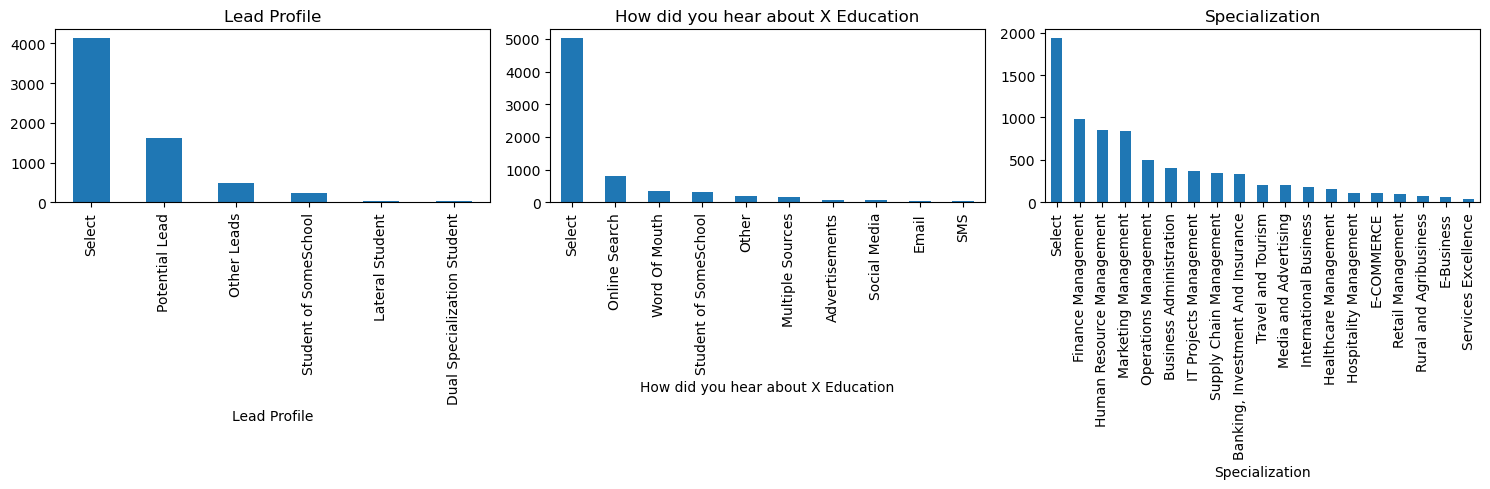

In [21]:
#visualising columns with select values 
col_list = ['Lead Profile','How did you hear about X Education', 'Specialization' ]

num_cols = len(col_list)
num_rows = (num_cols - 1) // 3 + 1  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figsize based on number of rows

for k, col in enumerate(col_list, start=1):
    plt.subplot(num_rows, 3, k)
    leads[col].value_counts().plot(kind='bar')
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
#checking the value count of these columns
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [23]:
leads['Lead Profile'].value_counts(normalize=True) * 100

Lead Profile
Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: proportion, dtype: float64

In [24]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [25]:
leads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

<span style="color:blue">**NOTE:**</span> we can observe that the columns `'Lead Profile'` and `'How did you hear about X Education'` have majority of rows with select value which is eqivalant to null value, so its better to drop these columns

In [26]:
#dropping them
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [27]:
#checking value counts
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

The variable 'What matters most to you in choosing a course' has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively, so it can be dropped

It is like 99 % of data is same. so we assume that it is 100 % homogenous and we'll drop it

In [28]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [29]:
#checking null values again
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Search                                       0
A free copy of Mastering The Interview       0
Through Recommendations                      0
Digital Advertisement                        0
Newspaper                                    0
X Education Forums                           0
Newspaper Article                            0
Prospect ID                                  0
Lead Number                                  0
Total Time Spent on Website                  0
Converted                                    0
Do Not Call                                  0
Do Not Email                                 0
Lead Origin                                  0
Last Notable Activity                        0
dtype: int64

In [30]:
# Dropping the null values rows in the column 'What is your current occupation' since it is an important vaiable for analysis

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [31]:
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Search                                      0
A free copy of Mastering The Interview      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Prospect ID                                 0
What is your current occupation             0
Lead Number                                 0
Total Time Spent on Website                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                                0
Lead Origin                                 0
Last Notable Activity                       0
dtype: int64

In [32]:
#dropping all the rows with null values
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [33]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [34]:
leads = leads[~pd.isnull(leads['Specialization'])]

In [35]:
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Specialization                            0
A free copy of Mastering The Interview    0
Through Recommendations                   0
Digital Advertisement                     0
Newspaper                                 0
X Education Forums                        0
Newspaper Article                         0
Search                                    0
What is your current occupation           0
Last Activity                             0
Lead Number                               0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Call                               0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
Last Notable Activity                     0
dtype: int64

<span style="color:blue">**NOTE:**</span> Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [36]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


In [37]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

            Specialization What is your current occupation Search  \
0                   Select                      Unemployed      0   
1                   Select                      Unemployed      0   
2  Business Administration                         Student      0   
3    Media and Advertising                      Unemployed      0   
4                   Select                      Unemployed      0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                     No   
1                  0                   0          0                     No   
2                  0                   0          0                     No   
3                  0                   0          0                     No   
4                  0                   0          0                     No   

  Through Recommendations  A free copy of Mastering The Interview  \
0                       0                                       0   
1                       0                                       0   
2                       0                                       1   
3                       0                                       0   
4                       0                                       0   

   Last Notable Activity  
0               Modified  
1           Email Opened  
2           Email Opened  
3               Modified  
4               Modified  

[5 rows x 21 columns]

In [38]:
#dropping all the irrelevant columns
leads.drop(['Prospect ID', 'Lead Number','Do Not Call', 'Search','Newspaper Article', 'X Education Forums','Newspaper', 
            'Digital Advertisement', 'Through Recommendations'], axis = 1, inplace = True)

In [39]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  A free copy of Mastering The Interview  \
0                      Unemployed                                       0   
1                      Unemployed                                       0   
2                         Student                                       1   
3                      Unemployed                                       0   
4                      Unemployed                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [40]:
leads.shape

(6373, 12)

<span style="color:blue">**NOTE:**</span> we are left with 6373 rows and 12 columns 

### Creating dummy variables

we create dummy cariables for the catagorial variables

In [41]:
#checking variables with datatype object
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [42]:
#creating dummy variables
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','Last Notable Activity']], drop_first=True)
dummy = dummy.astype(int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [43]:
#Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we drop that level by specifying it explicitly

dummy_2 = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_2 = dummy_2.drop(['Specialization_Select'],axis= 1)
dummy_2 = dummy_2.astype(int)
leads = pd.concat([leads, dummy_2], axis = 1)

In [44]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation  ...  Specialization_IT Projects Management  \
0                      Unemployed  ...                                      0   
1                      Unemployed  ...                                      0   
2                         Student  ...                                      0   
3                      Unemployed  ...                                      0   
4                      Unemployed  ...                                      0   

  Specialization_International Business  Specialization_Marketing Management  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 82 columns]

In [45]:
# Dropping the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'What is your current occupation', 'Specialization','Last Notable Activity'], axis=1)

In [46]:
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  Specialization_IT Projects Management  \
0  ...                                      0   
1  ...                                      0   
2  ...                                      0   
3  ...                                      0   
4  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2            

In [47]:
leads.shape

(6373, 74)

## Step 4.  Train-Tests Split
 

In [48]:
#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [49]:
# Put all the feature variables in X

X = leads.drop(['Converted'],axis= 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0 

In [50]:
# Putting Target variables to y
y = leads["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**NOTE:** Spliting the dataset into `70% train and 30% test`

In [52]:
# Check the shape
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (4461, 73) 
y_train: (4461,)


In [53]:
#Check the shape of Test
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (1912, 73) 
y_test: (1912,)


## Step 5. Feature Scaling 
For a few numeric variables present in the dataset which have different scales.

In [54]:
# Importing the 'MinMax scaler' Library
# Scaling the three numeric features present in the dataset
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [55]:
# X-train dataframe after standard scaling
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.064874                    -0.824395             -0.223652   
218      0.064874                    -0.611929              0.753710   
4171     0.431907                    -0.804919              1.731071   
4037    -0.669191                    -0.943022             -1.201013   
3660    -0.669191                    -0.943022             -1.201013   

      A free copy of Mastering The Interview  \
8003                                1.401471   
218                                 1.401471   
4171                                1.401471   
4037                               -0.713536   
3660                               -0.713536   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  ...  \
8003                     0                   0  ...   
218                      0                   0  ...   
4171                     0                   0  ...   
4037                     0                   0  ...   
3660                     0                   0  ...   

      Specialization_IT Projects Management  \
8003                                      1   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Spec

In [56]:
# repeating the same for test dataset as well
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [57]:
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771    -0.902685                    -0.955492             -1.044782   
6122     0.866207                    -0.838993              1.841743   
9202     0.108111                     0.716094              0.604661   
6570    -0.144588                     0.564292              0.192300   
2668     1.118906                     0.629602              0.604661   

      A free copy of Mastering The Interview  \
4771                               -0.731102   
6122                                1.367798   
9202                               -0.731102   
6570                               -0.731102   
2668                                1.367798   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4771                                    0                          1   
6122                                    1                          0   
9202                                    1                          0   
6570                                    1                          0   
2668                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4771                        0                           0   
6122                        0                           1   
9202                        0                           0   
6570                        0                           1   
2668                        0                           0   

      Lead Source_Facebook  Lead Source_Google  ...  \
4771                     0                   0  ...   
6122                     0                   0  ...   
9202                     0                   1  ...   
6570                     0                   0  ...   
2668                     0                   0  ...   

      Specialization_IT Projects Management  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_International Business  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Marketing Management  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Specialization_Media and Advertising  \
4771                                     0   
6122                                     0   
9202                                     0   
6570                                     0   
2668                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
4771                                     1                                 0   
6122                                     0                                 0   
9202                                     0                                 0   
6570                                     0                                 0   
2668                                     0                                 0   

      Specialization_Rural and Agribusiness  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Services Excellence  \
4771                                   0   
6122                                   0   
9202                                   0   
6570                                   0   
2668                                   0   

      Spec

In [58]:
# Checking the Lead Conversion Rate (LCR) - Target Variable:: "Converted"  
# Denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(leads['Converted'])/len(leads['Converted'].index))*100
LCR

48.093519535540565

<span style="color:blue">**NOTE:**</span>  Lead Conversion Rate :: `48.1%`

## Step 6. Correlations 
- `Feature elimination` based on `correlations`

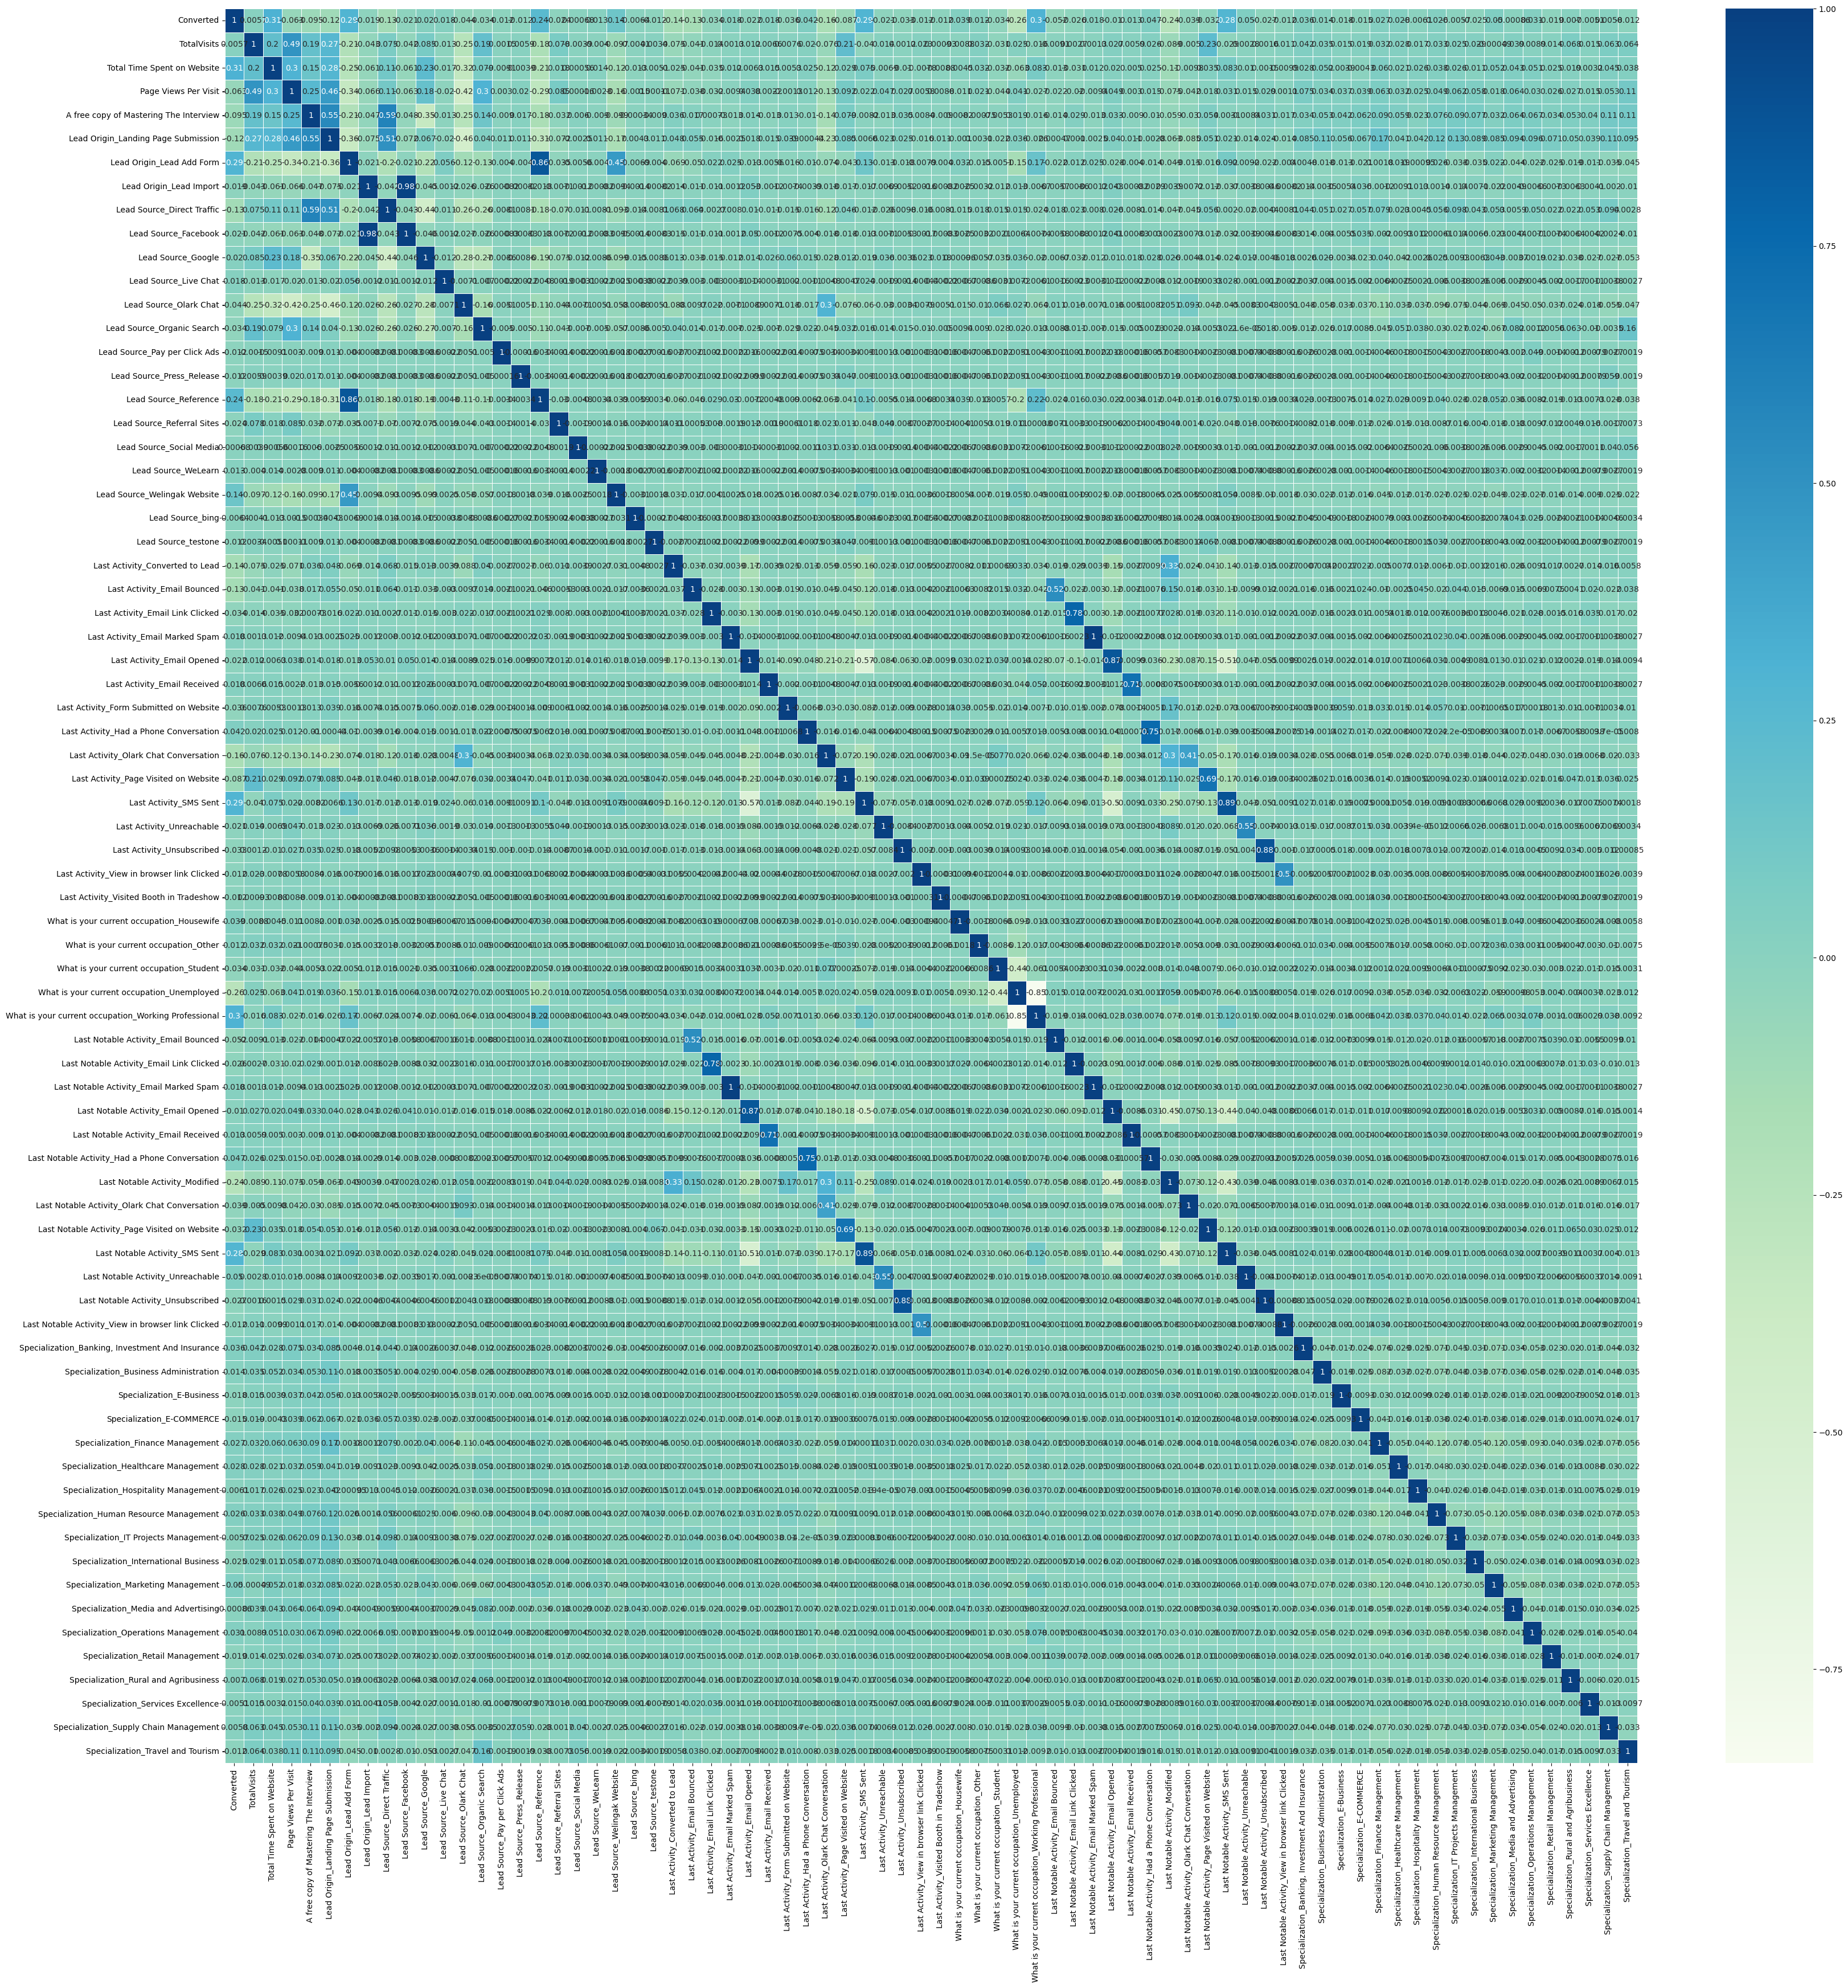

In [59]:
# analyse correlation matrix
plt.figure(figsize = (40,40))        
sns.heatmap(leads.corr(),linewidths=0.5,cmap="GnBu",annot=True)
plt.show()

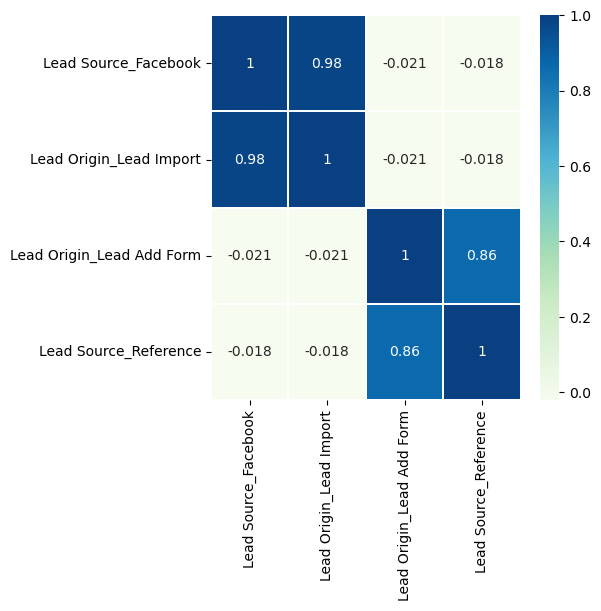

In [60]:
#As the heatmap includes numerous columns, we may split down suspected variables that may have a significant association with one another.
#We can also analyze variables from the same class from the graph.
plt.figure(figsize = (5,5))        
sns.heatmap(leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="GnBu",annot=True)
plt.show()

<span style="color:blue">**NOTE:**</span> `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'` These predictor variables above are very highly linked with each other at the diagonal (0.98 and 0.85), thus we should drop one of them from each pair because they will offer little value to our model. 

In [61]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

In [62]:
X_test.head()


TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771    -0.902685                    -0.955492             -1.044782   
6122     0.866207                    -0.838993              1.841743   
9202     0.108111                     0.716094              0.604661   
6570    -0.144588                     0.564292              0.192300   
2668     1.118906                     0.629602              0.604661   

      A free copy of Mastering The Interview  \
4771                               -0.731102   
6122                                1.367798   
9202                               -0.731102   
6570                               -0.731102   
2668                                1.367798   

      Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  \
4771                                    0                           0   
6122                                    1                           1   
9202                                    1                           0   
6570                                    1                           1   
2668                                    1                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
4771                     0                   0                      0   
6122                     0                   0                      0   
9202                     0                   1                      0   
6570                     0                   0                      0   
2668                     0                   0                      0   

      Lead Source_Olark Chat  ...  Specialization_IT Projects Management  \
4771                       0  ...                                      0   
6122                       0  ...                                      0   
9202                       0  ...                                      0   
6570                       0  ...                                      0   
2668                       0  ...                                      0   

      Specialization_International Business  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Marketing Management  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Specialization_Media and Advertising  \
4771                                     0   
6122                                     0   
9202                                     0   
6570                                     0   
2668                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
4771                                     1                                 0   
6122                                     0                                 0   
9202                                     0                                 0   
6570                                     0                                 0   
2668                                     0                                 0   

      Specialization_Rural and Agribusiness  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Services Excellence  \
4771                                   0   
6122                                   0   
9202                                   0   
6570                                   0   
2668                                   0   

      Specialization_Supply Chain Management  \
4771                                     

In [63]:
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.064874                    -0.824395             -0.223652   
218      0.064874                    -0.611929              0.753710   
4171     0.431907                    -0.804919              1.731071   
4037    -0.669191                    -0.943022             -1.201013   
3660    -0.669191                    -0.943022             -1.201013   

      A free copy of Mastering The Interview  \
8003                                1.401471   
218                                 1.401471   
4171                                1.401471   
4037                               -0.713536   
3660                               -0.713536   

      Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  \
8003                                    1                           1   
218                                     1                           1   
4171                                    1                           1   
4037                                    0                           0   
3660                                    0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
8003                     0                   0                      0   
218                      0                   0                      0   
4171                     0                   0                      0   
4037                     0                   0                      0   
3660                     0                   0                      0   

      Lead Source_Olark Chat  ...  Specialization_IT Projects Management  \
8003                       0  ...                                      1   
218                        0  ...                                      0   
4171                       0  ...                                      0   
4037                       1  ...                                      0   
3660                       0  ...                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                     

# Step 7. Feature selection using RFE

In [64]:
# creating a LogisticRegression object
logreg = LogisticRegression()

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)             # considering RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [66]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 8),
 ('Lead Source_Olark Chat', False, 50),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 41),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 6),
 ('Lead Source_testone', False, 29),
 ('Last Activity_Converted to Lead', False, 34),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 52),
 ('Last Activity_Email Marked Spam', False,

In [67]:
# viewing the RFE features in a ranking order
RFE_15 = pd.DataFrame()
RFE_15['features']=X_train.columns
RFE_15['Feature Chosen'] = rfe.support_
RFE_15['Ranking']=rfe.ranking_
RFE_15.sort_values(by='Ranking').head(30)

features  Feature Chosen  Ranking
17                       Lead Source_Welingak Website            True        1
1                         Total Time Spent on Website            True        1
38         What is your current occupation_Unemployed            True        1
39  What is your current occupation_Working Profes...            True        1
30                             Last Activity_SMS Sent            True        1
5                          Lead Source_Direct Traffic            True        1
27             Last Activity_Had a Phone Conversation            True        1
7                                  Lead Source_Google            True        1
45     Last Notable Activity_Had a Phone Conversation            True        1
50                  Last Notable Activity_Unreachable            True        1
10                         Lead Source_Organic Search            True        1
21                        Last Activity_Email Bounced            True        1
37            What is your current occupation_Student            True        1
13                              Lead Source_Reference            True        1
14                         Lead Source_Referral Sites            True        1
35          What is your current occupation_Housewife           False        2
46                     Last Notable Activity_Modified           False        3
51                 Last Notable Activity_Unsubscribed           False        4
28              Last Activity_Olark Chat Conversation           False        5
18                                   Lead Source_bing           False        6
53   Specialization_Banking, Investment And Insurance           False        7
8                               Lead Source_Live Chat           False        8
40                Last Notable Activity_Email Bounced           False        9
67              Specialization_Rural and Agribusiness           False       10
56                          Specialization_E-COMMERCE           False       11
63                Specialization_Marketing Management           False       12
58               Specialization_Healthcare Management           False       13
69             Specialization_Supply Chain Management           False       14
4                 Lead Origin_Landing Page Submission           False       15
55                          Specialization_E-Business           False       16

In [68]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [69]:
X_train = X_train[col]

# Step 8. Model building

In [70]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model - 1

In [72]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logmod1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2093.5
Date:                Mon, 22 Jul 2024   Deviance:                       4186.9
Time:                        11:37:08   Pearson chi2:                 4.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3601
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1569      0.564      3.827      0.000       1.052       3.262
Total Time Spent on Website                              1.1049      0.046     24.061      0.000       1.015       1.195
Lead Source_Direct Traffic                              -1.5705      0.126    -12.466      0.000      -1.817      -1.324
Lead Source_Google                                      -1.0559      0.121     -8.703      0.000      -1.294      -0.818
Lead Source_Organic Search                              -1.2368      0.142     -8.734      0.000      -1.514      -0.959
Lead Source_Reference                                    2.7499      0.264     10.403      0.000       2.232       3.268
Lead Source_Referral Sites                              -1.2426      0.369     -3.366      0.001      -1.966      -0.519
Lead Source_Welingak Website                             4.8220      1.011      4.769      0.000       2.840       6.804
Last Activity_Email Bounced                             -1.6940      0.369     -4.589      0.000      -2.417      -0.970
Last Activity_Had a Phone Conversation                   1.1609      0.995      1.167      0.243      -0.788       3.110
Last Activity_SMS Sent                                   1.1137      0.082     13.575      0.000       0.953       1.274
What is your current occupation_Student                 -1.7730      0.594     -2.984      0.003      -2.937      -0.609
What is your current occupation_Unemployed              -2.0108      0.557     -3.613      0.000      -3.102      -0.920
What is your current occupation_Working Professional     0.5957      0.587      1.015      0.310      -0.555       1.746
Last Notable Activity_Had a Phone Conversation          22.2160   1.25e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Notable Activity_Unreachable                        2.7988      0.813      3.444      0.001       1.206       4.392
========================================================================================================================
"""

#### Checking VIF

In [73]:
# lets define a function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

In [74]:
get_vif(X_train)

Features   VIF
0          What is your current occupation_Unemployed  7.00
1                                  Lead Source_Google  3.61
2                          Lead Source_Direct Traffic  3.24
3              Last Activity_Had a Phone Conversation  2.45
4      Last Notable Activity_Had a Phone Conversation  2.44
5                          Lead Source_Organic Search  2.08
6   What is your current occupation_Working Profes...  1.87
7                              Last Activity_SMS Sent  1.62
8                               Lead Source_Reference  1.56
9                         Total Time Spent on Website  1.28
10                       Lead Source_Welingak Website  1.16
11            What is your current occupation_Student  1.16
12                         Lead Source_Referral Sites  1.09
13                        Last Activity_Email Bounced  1.05
14                  Last Notable Activity_Unreachable  1.01

In [75]:
# here although some columns has high VIF, they are having less p-values.
# the column with high p-value here is 'Last Notable Activity_Had a Phone Conversation'
# we will drop this column

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model - 2

In [77]:
# fitting the regression model again
X_train_sm = sm.add_constant(X_train)
logmod2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2096.4
Date:                Mon, 22 Jul 2024   Deviance:                       4192.7
Time:                        11:37:37   Pearson chi2:                 4.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3592
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1562      0.564      3.826      0.000       1.052       3.261
Total Time Spent on Website                              1.1029      0.046     24.036      0.000       1.013       1.193
Lead Source_Direct Traffic                              -1.5685      0.126    -12.456      0.000      -1.815      -1.322
Lead Source_Google                                      -1.0506      0.121     -8.668      0.000      -1.288      -0.813
Lead Source_Organic Search                              -1.2401      0.142     -8.757      0.000      -1.518      -0.963
Lead Source_Reference                                    2.7498      0.264     10.403      0.000       2.232       3.268
Lead Source_Referral Sites                              -1.2518      0.371     -3.374      0.001      -1.979      -0.525
Lead Source_Welingak Website                             4.8218      1.011      4.769      0.000       2.840       6.804
Last Activity_Email Bounced                             -1.6930      0.369     -4.587      0.000      -2.416      -0.970
Last Activity_Had a Phone Conversation                   2.8920      0.807      3.584      0.000       1.310       4.474
Last Activity_SMS Sent                                   1.1135      0.082     13.576      0.000       0.953       1.274
What is your current occupation_Student                 -1.7740      0.594     -2.986      0.003      -2.938      -0.610
What is your current occupation_Unemployed              -2.0117      0.557     -3.615      0.000      -3.103      -0.921
What is your current occupation_Working Professional     0.5925      0.587      1.009      0.313      -0.558       1.743
Last Notable Activity_Unreachable                        2.7967      0.813      3.442      0.001       1.204       4.389
========================================================================================================================
"""

In [78]:
get_vif(X_train)

Features   VIF
0          What is your current occupation_Unemployed  7.00
1                                  Lead Source_Google  3.61
2                          Lead Source_Direct Traffic  3.24
3                          Lead Source_Organic Search  2.08
4   What is your current occupation_Working Profes...  1.87
5                              Last Activity_SMS Sent  1.62
6                               Lead Source_Reference  1.56
7                         Total Time Spent on Website  1.28
8                        Lead Source_Welingak Website  1.16
9             What is your current occupation_Student  1.16
10                         Lead Source_Referral Sites  1.09
11                        Last Activity_Email Bounced  1.05
12             Last Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01

In [79]:
# lets drop the column with high VIF 'What is your current occupation_Unemployed'

X_train.drop('What is your current occupation_Unemployed',axis=1,inplace=True)

### Model - 3

In [80]:
# lets fit the regression model again
X_train_sm = sm.add_constant(X_train)
logmod3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2104.1
Date:                Mon, 22 Jul 2024   Deviance:                       4208.2
Time:                        11:37:50   Pearson chi2:                 4.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3570
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1562      0.099      1.580      0.114      -0.038       0.350
Total Time Spent on Website                              1.1039      0.046     24.102      0.000       1.014       1.194
Lead Source_Direct Traffic                              -1.5571      0.126    -12.399      0.000      -1.803      -1.311
Lead Source_Google                                      -1.0459      0.121     -8.644      0.000      -1.283      -0.809
Lead Source_Organic Search                              -1.2198      0.141     -8.639      0.000      -1.496      -0.943
Lead Source_Reference                                    2.7668      0.264     10.478      0.000       2.249       3.284
Lead Source_Referral Sites                              -1.2608      0.371     -3.401      0.001      -1.987      -0.534
Lead Source_Welingak Website                             4.8185      1.011      4.766      0.000       2.837       6.800
Last Activity_Email Bounced                             -1.7122      0.369     -4.642      0.000      -2.435      -0.989
Last Activity_Had a Phone Conversation                   2.8691      0.807      3.555      0.000       1.287       4.451
Last Activity_SMS Sent                                   1.0938      0.082     13.377      0.000       0.934       1.254
What is your current occupation_Student                  0.2222      0.217      1.025      0.305      -0.203       0.647
What is your current occupation_Working Professional     2.5900      0.196     13.191      0.000       2.205       2.975
Last Notable Activity_Unreachable                        2.7901      0.810      3.444      0.001       1.202       4.378
========================================================================================================================
"""

In [81]:
get_vif(X_train)

Features   VIF
0                              Last Activity_SMS Sent  1.51
1                               Lead Source_Reference  1.24
2                                  Lead Source_Google  1.22
3                          Lead Source_Direct Traffic  1.21
4   What is your current occupation_Working Profes...  1.20
5                         Total Time Spent on Website  1.14
6                          Lead Source_Organic Search  1.11
7                        Lead Source_Welingak Website  1.05
8                         Last Activity_Email Bounced  1.05
9             What is your current occupation_Student  1.03
10             Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01
12                         Lead Source_Referral Sites  1.00

In [82]:
# Dropping the column 'What is your current occupation_Student' as its having high p-value

X_train.drop('What is your current occupation_Student', axis =1, inplace = True)

### Model - 4

In [83]:
X_train_sm = sm.add_constant(X_train)
logmod4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logmod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2104.6
Date:                Mon, 22 Jul 2024   Deviance:                       4209.3
Time:                        11:41:34   Pearson chi2:                 4.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3569
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1698      0.098      1.733      0.083      -0.022       0.362
Total Time Spent on Website                              1.1041      0.046     24.107      0.000       1.014       1.194
Lead Source_Direct Traffic                              -1.5602      0.126    -12.424      0.000      -1.806      -1.314
Lead Source_Google                                      -1.0529      0.121     -8.713      0.000      -1.290      -0.816
Lead Source_Organic Search                              -1.2261      0.141     -8.696      0.000      -1.502      -0.950
Lead Source_Reference                                    2.7649      0.264     10.471      0.000       2.247       3.282
Lead Source_Referral Sites                              -1.2735      0.370     -3.438      0.001      -2.000      -0.547
Lead Source_Welingak Website                             4.8084      1.011      4.756      0.000       2.827       6.790
Last Activity_Email Bounced                             -1.7166      0.369     -4.653      0.000      -2.440      -0.994
Last Activity_Had a Phone Conversation                   2.8614      0.807      3.546      0.000       1.280       4.443
Last Activity_SMS Sent                                   1.0885      0.082     13.349      0.000       0.929       1.248
What is your current occupation_Working Professional     2.5828      0.196     13.165      0.000       2.198       2.967
Last Notable Activity_Unreachable                        2.7816      0.810      3.433      0.001       1.194       4.369
========================================================================================================================
"""

Here the p-values and VIF's of features are in our limits. so we'll consider this as the final model.

# Step 9. Model evaluation

In [84]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.229325
218     0.112446
4171    0.092871
4037    0.294968
3660    0.951753
207     0.198192
2044    0.231656
6411    0.959937
6498    0.044236
2085    0.980868
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22932534, 0.11244609, 0.09287106, 0.29496823, 0.95175348,
       0.1981921 , 0.23165587, 0.95993719, 0.04423555, 0.98086769])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [86]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.229325
1          0         0.112446
2          1         0.092871
3          1         0.294968
4          1         0.951753

##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [87]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.229325          0
1          0         0.112446          0
2          1         0.092871          0
3          1         0.294968          0
4          1         0.951753          1

#### For evaluation we'll import further libraries from SKLearn

In [88]:
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#### Confusion Matrix

In [89]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1926  386]
 [ 564 1585]]


In [90]:
# checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7870432638421878


In [91]:
# evaluating the other metrics

TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Calculating the 'sensitivity'
TP/(TP+FN)

0.7375523499302001

In [93]:
# Calculating the 'specificity'
TN/(TN+FP)

0.833044982698962

In [94]:
# Calculate false postive rate - predicting conversion when customer does not have converted
FP/ float(TN+FP)

0.16695501730103807

In [95]:
# positive predictive value 
TP / float(TP+FP)

0.8041603247082699

In [96]:
# Negative predictive value
TN / float(TN+ FN)

0.7734939759036145

# Step 10. Plotting ROC curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate=False)

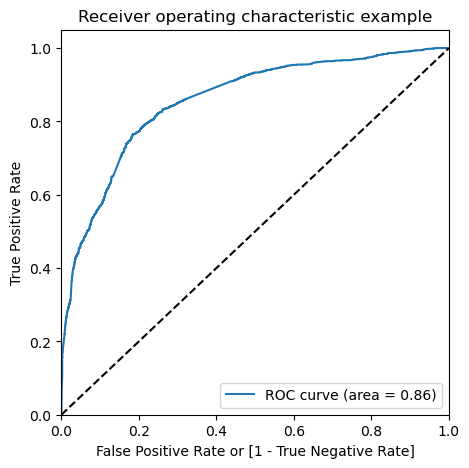

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Step 11. Finding Optimal Cutoff point

In [100]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.229325          0    1    1    1    0    0    0    0   
1          0         0.112446          0    1    1    0    0    0    0    0   
2          1         0.092871          0    1    0    0    0    0    0    0   
3          1         0.294968          0    1    1    1    0    0    0    0   
4          1         0.951753          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [101]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.530599  0.990693  0.102941
0.2   0.2  0.681013  0.947417  0.433391
0.3   0.3  0.767989  0.859004  0.683391
0.4   0.4  0.786147  0.797580  0.775519
0.5   0.5  0.787043  0.737552  0.833045
0.6   0.6  0.753419  0.615170  0.881920
0.7   0.7  0.735485  0.538855  0.918253
0.8   0.8  0.710379  0.446719  0.955450
0.9   0.9  0.643129  0.274546  0.985727


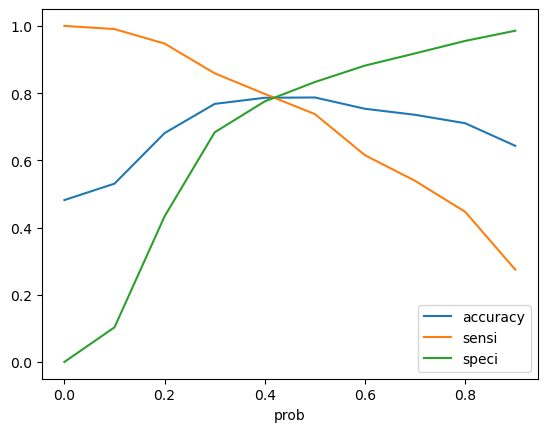

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.41 or 0.42 is the optimum point to take it as a cutoff probability

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.229325          0    1    1    1    0    0    0    0   
1          0         0.112446          0    1    1    0    0    0    0    0   
2          1         0.092871          0    1    0    0    0    0    0    0   
3          1         0.294968          0    1    1    1    0    0    0    0   
4          1         0.951753          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [104]:
# Let's check the `accuracy` now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.787939923783905

In [105]:
# Let's create the confusion matrix once again and other metrics as well

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1828,  484],
       [ 462, 1687]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Sensitivity
TP/(TP+FN)

0.7850162866449512

In [108]:
# Specificity
TN/(TN+FP)

0.7906574394463668

In [109]:
# false postive rate
FP/ float(TN+FP)

0.2093425605536332

In [110]:
# Positive predictive value
TP / float(TP+FP)

0.7770612620912022

In [111]:
# Negative predictive value
TN / float(TN+ FN)

0.7982532751091703

### Precision and Recall

In [112]:
# confusion matrix
print(confusion)

[[1926  386]
 [ 564 1585]]


In [113]:
# Precision (TP / TP + FP)

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8041603247082699

In [114]:
# Recall (TP / TP + FN)

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7375523499302001

In [115]:
from sklearn.metrics import precision_score, recall_score

In [116]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8041603247082699

In [117]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7375523499302001

#### Precision and recall tradeoff

In [118]:
from sklearn.metrics import precision_recall_curve

In [119]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

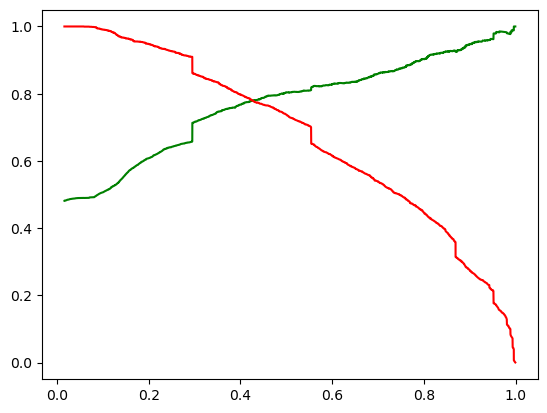

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 12. Making Predictions on Test Set

In [122]:
# Lets look at our test set
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4771    -0.902685                    -0.955492             -1.044782   
6122     0.866207                    -0.838993              1.841743   
9202     0.108111                     0.716094              0.604661   
6570    -0.144588                     0.564292              0.192300   
2668     1.118906                     0.629602              0.604661   

      A free copy of Mastering The Interview  \
4771                               -0.731102   
6122                                1.367798   
9202                               -0.731102   
6570                               -0.731102   
2668                                1.367798   

      Lead Origin_Landing Page Submission  Lead Source_Direct Traffic  \
4771                                    0                           0   
6122                                    1                           1   
9202                                    1                           0   
6570                                    1                           1   
2668                                    1                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
4771                     0                   0                      0   
6122                     0                   0                      0   
9202                     0                   1                      0   
6570                     0                   0                      0   
2668                     0                   0                      0   

      Lead Source_Olark Chat  ...  Specialization_IT Projects Management  \
4771                       0  ...                                      0   
6122                       0  ...                                      0   
9202                       0  ...                                      0   
6570                       0  ...                                      0   
2668                       0  ...                                      0   

      Specialization_International Business  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Marketing Management  \
4771                                    0   
6122                                    0   
9202                                    0   
6570                                    0   
2668                                    0   

      Specialization_Media and Advertising  \
4771                                     0   
6122                                     0   
9202                                     0   
6570                                     0   
2668                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
4771                                     1                                 0   
6122                                     0                                 0   
9202                                     0                                 0   
6570                                     0                                 0   
2668                                     0                                 0   

      Specialization_Rural and Agribusiness  \
4771                                      0   
6122                                      0   
9202                                      0   
6570                                      0   
2668                                      0   

      Specialization_Services Excellence  \
4771                                   0   
6122                                   0   
9202                                   0   
6570                                   0   
2668                                   0   

      Specialization_Supply Chain Management  \
4771                                     

In [123]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [124]:
X_test_sm.head()

const  Total Time Spent on Website  Lead Source_Direct Traffic  \
4771    1.0                    -0.955492                           0   
6122    1.0                    -0.838993                           1   
9202    1.0                     0.716094                           0   
6570    1.0                     0.564292                           1   
2668    1.0                     0.629602                           0   

      Lead Source_Google  Lead Source_Organic Search  Lead Source_Reference  \
4771                   0                           0                      1   
6122                   0                           0                      0   
9202                   1                           0                      0   
6570                   0                           0                      0   
2668                   0                           1                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
4771                           0                             0   
6122                           0                             0   
9202                           0                             0   
6570                           0                             0   
2668                           0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
4771                            0                                       0   
6122                            0                                       0   
9202                            0                                       0   
6570                            0                                       0   
2668                            0                                       0   

      Last Activity_SMS Sent  What is your current occupation_Student  \
4771                       1                                        0   
6122                       0                                        0   
9202                       1                                        0   
6570                       1                                        0   
2668                       1                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [125]:
# lets drop the exact columns we dropped for X_train dataset

X_test_sm.drop(['What is your current occupation_Unemployed','What is your current occupation_Student', 'Last Notable Activity_Had a Phone Conversation'],axis=1, inplace = True)

In [126]:
# Make predictions on 'y_test'

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4771    0.996132
6122    0.089750
9202    0.730276
6570    0.579593
2668    0.674212
4233    0.941922
3368    0.765680
9091    0.465741
5972    0.227858
3631    0.707314
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
y_pred_1.head()

0
4771  0.996132
6122  0.089750
9202  0.730276
6570  0.579593
2668  0.674212

In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [130]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996132
1          0  0.089750
2          0  0.730276
3          1  0.579593
4          1  0.674212

In [133]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [134]:
y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996132
1          0         0.089750
2          0         0.730276
3          1         0.579593
4          1         0.674212

In [135]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996132                1
1          0         0.089750                0
2          0         0.730276                1
3          1         0.579593                1
4          1         0.674212                1

In [136]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7928870292887029

In [137]:
confusion3 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion3

array([[797, 199],
       [197, 719]], dtype=int64)

In [138]:
TP = confusion3[1,1] # true positives 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7849344978165939

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8002008032128514